<a href="https://colab.research.google.com/github/atnawshin/Machine-Learning/blob/main/BanglaDataProcessing1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import string
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [462]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
#path ='/content/drive/My Drive/Colab Notebooks/NLP Projects/Sentiment Analysis/' 
#stopwords_list = path+'bangla_stopwords.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [391]:
df = pd.read_excel('fbdataset.xlsx')
df.head(2)

,@LABEL,Created Time,Writer,Reaction Count,Comment Count,Share Count,Label,Text
0,163059227060505_6066791063353929,2022-07-21 04:55:09,Prothom Alo,10,0,0,1,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...
1,163059227060505_6066743890025313,2022-07-21 04:30:30,Prothom Alo,155,15,1,0,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...


In [392]:
print(df)

                                @LABEL         Created Time       Writer  \
0     163059227060505_6066791063353929  2022-07-21 04:55:09  Prothom Alo   
1     163059227060505_6066743890025313  2022-07-21 04:30:30  Prothom Alo   
2     163059227060505_6066725910027111  2022-07-21 04:21:08  Prothom Alo   
3     163059227060505_6066640633368972  2022-07-21 03:40:12  Prothom Alo   
4     163059227060505_6066608523372183  2022-07-21 03:25:09  Prothom Alo   
..                                 ...                  ...          ...   
278  103039661944184_366206938960787_2  2022-07-15 13:30:58         None   
279  103039661944184_366206938960787_3  2022-07-15 21:06:31         None   
280  103039661944184_366206548960826_1  2022-07-15 13:01:39         None   
281  103039661944184_365828448998636_1  2022-07-15 02:22:55         None   
282  103039661944184_365827455665402_1  2022-07-15 01:17:21         None   

     Reaction Count  Comment Count Share Count  Label  \
0                10           

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   @LABEL          283 non-null    object
 1   Created Time    283 non-null    object
 2   Writer          283 non-null    object
 3   Reaction Count  283 non-null    int64 
 4   Comment Count   283 non-null    int64 
 5   Share Count     283 non-null    object
 6   Label           283 non-null    int64 
 7   Text            283 non-null    object
dtypes: int64(3), object(5)
memory usage: 17.8+ KB


In [394]:
df.shape

(283, 8)

In [395]:
df.dtypes

@LABEL            object
Created Time      object
Writer            object
Reaction Count     int64
Comment Count      int64
Share Count       object
Label              int64
Text              object
dtype: object

In [396]:
data = df[['Text', 'Label']]
data.head()

,Text,Label
0,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,1
1,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,0
2,- Story Of My Life😔 - দেখতে বাজে😪 - কেউ পাত্ত...,1
3,- আচ্ছা! - আমার কাছে যদি চাওয়ার কিছু সুযোগ পা...,0
4,"- আজ পর্যন্ত কারোর😓 - Dp, Cover, Status, Day,...",0


In [397]:
#columns rename
#data = dta.rename(columns={"Recommended IND": "Recommended", "review": "Review"})
#data.head()
data.isnull().sum()

Text     0
Label    0
dtype: int64

In [398]:
#drop null values
data.dropna(subset=['Text'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [399]:
data.isnull().sum()

Text     0
Label    0
dtype: int64

In [400]:
data['Text'] = data['Text'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [401]:
data.shape

(283, 2)

In [402]:
data['Text'].value_counts()

চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদের শাস্তি নিশ্চিত করার ঘোষণা দিয়েছেন চট্টগ্রাম বিশ্ববিদ্যালয়ের ভারপ্রাপ্ত রেজিস্ট্রার এস এম মনিরুল হাসান।    1
thik                                                                                                                                                                   1
Orpita Saha 🙄🙄🙄                                                                                                                                                        1
😁😁😁                                                                                                                                                                    1
Aho vatija aho tmre dimu na 😏😒😒                                                                                                                                        1
                                                                                                                                                           

In [403]:
data.duplicated().sum()

0

Translat all the texts into Bangla

In [404]:
#!pip3 install googletrans==3.1.0a0

In [405]:
#Translate the other languages to Bangla
import googletrans
from googletrans import *
translator = googletrans.Translator()

data['Text'] = data['Text'].astype(str) #changing datatype to string
data['Translated Text'] = data['Text'].apply(translator.translate, src='auto', dest='bn').apply(getattr, args=('text',))
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Text,Label,Translated Text
0,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,1,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...
1,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,0,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...
2,- Story Of My Life😔 - দেখতে বাজে😪 - কেউ পাত্ত...,1,- Story Of My Life😔 - দেখতে বাজে😪 - কেউ পাত্ত...
3,- আচ্ছা! - আমার কাছে যদি চাওয়ার কিছু সুযোগ পা...,0,- আচ্ছা! - আমার কাছে যদি চাওয়ার কিছু সুযোগ পা...
4,"- আজ পর্যন্ত কারোর😓 - Dp, Cover, Status, Day,...",0,"- আজ পর্যন্ত কারোর😓 - Dp, Cover, Status, Day,..."
...,...,...,...
278,Right,0,ঠিক
279,Ak dom,0,ঘর হলে
280,Bal......,0,বল......
281,কিছু কইলাম না 😈,0,কিছু কইলাম না 😈


In [406]:
data.head(2)

,Text,Label,Translated Text
0,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,1,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...
1,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,0,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...


Removing Puntuation

In [407]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [408]:
def remove_punctuation(Translated_Text):
    punctuation_list = str(string.punctuation) + "।"
    text_nopunct = "".join([c for c in Translated_Text if c not in punctuation_list])
    return text_nopunct

In [409]:
def remove_garbage(a):
  a= "".join(i for i in a if i in ["।"] or 2432 <= ord(i) <= 2559 or ord(i)== 32)
  removed=" ".join(a.split())
  return removed

In [410]:
data['Removed Puncutation'] = data['Translated Text'].apply(lambda x:remove_punctuation(x))
data.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Text,Label,Translated Text,Removed Puncutation
0,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,1,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...
1,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,0,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,Dear বান্ধুবি আর কতো অপেক্ষা করাবি বইন🙄 এইব...


Remove English

In [411]:
#data['remove Eng'] = data['Removed Puncutation'].apply(lambda x:remove_garbage(x))
#data

In [412]:
#!pip install bnlp_toolkit

In [413]:
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

data['Removed Stopped word'] = data['Removed Puncutation'].apply(lambda x: remove_stopwords(x,stopwords))
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Text,Label,Translated Text,Removed Puncutation,Removed Stopped word
0,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,1,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,"[দিনের, শিক্ষার্থীকে, যৌন, নিপীড়নে, জড়িত, ব্..."
1,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,0,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,Dear বান্ধুবি আর কতো অপেক্ষা করাবি বইন🙄 এইব...,"[Dear, বান্ধুবি, কতো, অপেক্ষা, করাবি, বইন🙄, এই..."
2,- Story Of My Life😔 - দেখতে বাজে😪 - কেউ পাত্ত...,1,- Story Of My Life😔 - দেখতে বাজে😪 - কেউ পাত্ত...,Story Of My Life😔 দেখতে বাজে😪 কেউ পাত্তা দ...,"[Story, Of, My, Life😔, বাজে😪, পাত্তা, 😒, ভালোব..."
3,- আচ্ছা! - আমার কাছে যদি চাওয়ার কিছু সুযোগ পা...,0,- আচ্ছা! - আমার কাছে যদি চাওয়ার কিছু সুযোগ পা...,আচ্ছা আমার কাছে যদি চাওয়ার কিছু সুযোগ পাও😱 ...,"[আচ্ছা, চাওয়ার, সুযোগ, পাও😱, চাইবে🙄🐸]"
4,"- আজ পর্যন্ত কারোর😓 - Dp, Cover, Status, Day,...",0,"- আজ পর্যন্ত কারোর😓 - Dp, Cover, Status, Day,...",আজ পর্যন্ত কারোর😓 Dp Cover Status Day Bio W...,"[কারোর😓, Dp, Cover, Status, Day, Bio, Wallpape..."
...,...,...,...,...,...
278,Right,0,ঠিক,ঠিক,[]
279,Ak dom,0,ঘর হলে,ঘর হলে,[ঘর]
280,Bal......,0,বল......,বল,[বল]
281,কিছু কইলাম না 😈,0,কিছু কইলাম না 😈,কিছু কইলাম না 😈,"[কইলাম, 😈]"


In [414]:
def stopwords(review):
    text = [word.lower() for word in review.split() if word.lower() not in stop_words and word.lower() not in clothes]
    return " ".join(text)

In [415]:
data.head(2)

,Text,Label,Translated Text,Removed Puncutation,Removed Stopped word
0,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,1,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,"[দিনের, শিক্ষার্থীকে, যৌন, নিপীড়নে, জড়িত, ব্..."
1,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,0,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,Dear বান্ধুবি আর কতো অপেক্ষা করাবি বইন🙄 এইব...,"[Dear, বান্ধুবি, কতো, অপেক্ষা, করাবি, বইন🙄, এই..."


Removing Emojis

In [416]:
#remove emojis
import string
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F" #emoticons
        u"\U0001F300-\U0001F5FF" #symbols & pictographs
        u"\U0001F680-\U0001F6FF" #transport & map symbols
        u"\U0001F1E0-\U0001F1FF" #flags(ios)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251" 
        "]+",
        flags=re.UNICODE, 
    )
    return emoji_pattern.sub(r"",string)

In [417]:
data['Removed Stopped word'] = data['Removed Stopped word'].astype(str)
data['Removed Stopped word'] = data['Removed Stopped word'].apply(lambda x:remove_emoji(x))
data.to_csv('output.csv',index=False, encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [418]:
data.head(2)

,Text,Label,Translated Text,Removed Puncutation,Removed Stopped word
0,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,1,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,"['দিনের', 'শিক্ষার্থীকে', 'যৌন', 'নিপীড়নে', '..."
1,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,0,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,Dear বান্ধুবি আর কতো অপেক্ষা করাবি বইন🙄 এইব...,"['Dear', 'বান্ধুবি', 'কতো', 'অপেক্ষা', 'করাবি'..."


In [419]:
data.columns

Index(['Text', 'Label', 'Translated Text', 'Removed Puncutation',
       'Removed Stopped word'],
      dtype='object')

In [420]:
data['remove Eng'] = data['Removed Stopped word'].apply(lambda x:remove_garbage(x))
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Text,Label,Translated Text,Removed Puncutation,Removed Stopped word,remove Eng
0,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,1,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,"['দিনের', 'শিক্ষার্থীকে', 'যৌন', 'নিপীড়নে', '...",দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...
1,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,0,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,Dear বান্ধুবি আর কতো অপেক্ষা করাবি বইন🙄 এইব...,"['Dear', 'বান্ধুবি', 'কতো', 'অপেক্ষা', 'করাবি'...",বান্ধুবি কতো অপেক্ষা করাবি বইন এইবারতো বিয়েটা কর
2,- Story Of My Life😔 - দেখতে বাজে😪 - কেউ পাত্ত...,1,- Story Of My Life😔 - দেখতে বাজে😪 - কেউ পাত্ত...,Story Of My Life😔 দেখতে বাজে😪 কেউ পাত্তা দ...,"['Story', 'Of', 'My', 'Life', 'বাজে', 'পাত্তা'...",বাজে পাত্তা ভালোবাসে পছন্দ না
3,- আচ্ছা! - আমার কাছে যদি চাওয়ার কিছু সুযোগ পা...,0,- আচ্ছা! - আমার কাছে যদি চাওয়ার কিছু সুযোগ পা...,আচ্ছা আমার কাছে যদি চাওয়ার কিছু সুযোগ পাও😱 ...,"['আচ্ছা', 'চাওয়ার', 'সুযোগ', 'পাও', 'চাইবে']",আচ্ছা চাওয়ার সুযোগ পাও চাইবে
4,"- আজ পর্যন্ত কারোর😓 - Dp, Cover, Status, Day,...",0,"- আজ পর্যন্ত কারোর😓 - Dp, Cover, Status, Day,...",আজ পর্যন্ত কারোর😓 Dp Cover Status Day Bio W...,"['কারোর', 'Dp', 'Cover', 'Status', 'Day', 'Bio...",কারোর পারা আমি
...,...,...,...,...,...,...
278,Right,0,ঠিক,ঠিক,[],
279,Ak dom,0,ঘর হলে,ঘর হলে,['ঘর'],ঘর
280,Bal......,0,বল......,বল,['বল'],বল
281,কিছু কইলাম না 😈,0,কিছু কইলাম না 😈,কিছু কইলাম না 😈,"['কইলাম', '']",কইলাম


In [421]:
data.columns

Index(['Text', 'Label', 'Translated Text', 'Removed Puncutation',
       'Removed Stopped word', 'remove Eng'],
      dtype='object')

In [422]:
def numbers(remove_Eng):
    new_text = []
    for word in remove_Eng.split():
        if not re.search('\d', word):
            new_text.append(word)
    return ' '.join(new_text)   

In [423]:
data['remove Eng'] = data['remove Eng'].apply(numbers)
data.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Text,Label,Translated Text,Removed Puncutation,Removed Stopped word,remove Eng
0,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,1,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,"['দিনের', 'শিক্ষার্থীকে', 'যৌন', 'নিপীড়নে', '...",দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...
1,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,0,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,Dear বান্ধুবি আর কতো অপেক্ষা করাবি বইন🙄 এইব...,"['Dear', 'বান্ধুবি', 'কতো', 'অপেক্ষা', 'করাবি'...",বান্ধুবি কতো অপেক্ষা করাবি বইন এইবারতো বিয়েটা কর


In [424]:
data.columns

Index(['Text', 'Label', 'Translated Text', 'Removed Puncutation',
       'Removed Stopped word', 'remove Eng'],
      dtype='object')

In [425]:
lem = WordNetLemmatizer()

def lemma(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [426]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [427]:
data['remove Eng'] = data['remove Eng'].apply(lemma)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Text,Label,Translated Text,Removed Puncutation,Removed Stopped word,remove Eng
0,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,1,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,"['দিনের', 'শিক্ষার্থীকে', 'যৌন', 'নিপীড়নে', '...",দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...
1,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,0,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,Dear বান্ধুবি আর কতো অপেক্ষা করাবি বইন🙄 এইব...,"['Dear', 'বান্ধুবি', 'কতো', 'অপেক্ষা', 'করাবি'...",বান্ধুবি কতো অপেক্ষা করাবি বইন এইবারতো বিয়েটা কর
2,- Story Of My Life😔 - দেখতে বাজে😪 - কেউ পাত্ত...,1,- Story Of My Life😔 - দেখতে বাজে😪 - কেউ পাত্ত...,Story Of My Life😔 দেখতে বাজে😪 কেউ পাত্তা দ...,"['Story', 'Of', 'My', 'Life', 'বাজে', 'পাত্তা'...",বাজে পাত্তা ভালোবাসে পছন্দ না
3,- আচ্ছা! - আমার কাছে যদি চাওয়ার কিছু সুযোগ পা...,0,- আচ্ছা! - আমার কাছে যদি চাওয়ার কিছু সুযোগ পা...,আচ্ছা আমার কাছে যদি চাওয়ার কিছু সুযোগ পাও😱 ...,"['আচ্ছা', 'চাওয়ার', 'সুযোগ', 'পাও', 'চাইবে']",আচ্ছা চাওয়ার সুযোগ পাও চাইবে
4,"- আজ পর্যন্ত কারোর😓 - Dp, Cover, Status, Day,...",0,"- আজ পর্যন্ত কারোর😓 - Dp, Cover, Status, Day,...",আজ পর্যন্ত কারোর😓 Dp Cover Status Day Bio W...,"['কারোর', 'Dp', 'Cover', 'Status', 'Day', 'Bio...",কারোর পারা আমি


In [428]:
data.columns

Index(['Text', 'Label', 'Translated Text', 'Removed Puncutation',
       'Removed Stopped word', 'remove Eng'],
      dtype='object')

In [429]:
#!pip install bnlp_toolkit

In [430]:
#!pip install bnltk

In [431]:
#!pip install bangla-stemmer

In [432]:
#from bnltk.tokenize import Tokenizers
#t = Tokenizers()
#print(t.bn_word_tokenizer(' আমার সোনার বাংলা । '))		

In [433]:
#from nltk import tokenize
#data['tokenized'] = data['remove Eng'].apply(lambda x:tokenize.TabTokenizer())

In [434]:
data.head(2)

,Text,Label,Translated Text,Removed Puncutation,Removed Stopped word,remove Eng
0,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,1,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,"['দিনের', 'শিক্ষার্থীকে', 'যৌন', 'নিপীড়নে', '...",দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...
1,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,0,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,Dear বান্ধুবি আর কতো অপেক্ষা করাবি বইন🙄 এইব...,"['Dear', 'বান্ধুবি', 'কতো', 'অপেক্ষা', 'করাবি'...",বান্ধুবি কতো অপেক্ষা করাবি বইন এইবারতো বিয়েটা কর


In [435]:
data.columns

Index(['Text', 'Label', 'Translated Text', 'Removed Puncutation',
       'Removed Stopped word', 'remove Eng'],
      dtype='object')

In [436]:
#!pip install bangla-stemmer

In [437]:
from bangla_stemmer.stemmer import stemmer
wordlist = ['কবিরগুলিকে', 'আমাকে', 'নামাবার']
stmr = stemmer.BanglaStemmer()
stm = stmr.stem(wordlist)
print(stm)

applied first rules..
applied third rules..
applied first rules..
applied fourth rules..
['কবির', 'আমা', 'নামা']


In [438]:
from bangla_stemmer.stemmer import stemmer
stmr = stemmer.BanglaStemmer()

In [ ]:
data['stemmed'] = data['remove Eng'].apply(lambda x:stmr.stem(x))

In [440]:
data.columns

Index(['Text', 'Label', 'Translated Text', 'Removed Puncutation',
       'Removed Stopped word', 'remove Eng', 'stemmed'],
      dtype='object')

In [441]:
data.head(2)

,Text,Label,Translated Text,Removed Puncutation,Removed Stopped word,remove Eng,stemmed
0,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,1,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,"['দিনের', 'শিক্ষার্থীকে', 'যৌন', 'নিপীড়নে', '...",দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...,দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...
1,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,0,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,Dear বান্ধুবি আর কতো অপেক্ষা করাবি বইন🙄 এইব...,"['Dear', 'বান্ধুবি', 'কতো', 'অপেক্ষা', 'করাবি'...",বান্ধুবি কতো অপেক্ষা করাবি বইন এইবারতো বিয়েটা কর,বান্ধুবি কতো অপেক্ষা করাবি বইন এইবারতো বিয়েটা কর


In [442]:
#data['sentence']=data['stemmed'].apply(' '.join)
#data.head()

In [443]:
#!pip install bnlp

In [444]:
data.columns

Index(['Text', 'Label', 'Translated Text', 'Removed Puncutation',
       'Removed Stopped word', 'remove Eng', 'stemmed'],
      dtype='object')

In [446]:
data.head(1)

,Text,Label,Translated Text,Removed Puncutation,Removed Stopped word,remove Eng,stemmed
0,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,1,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,"['দিনের', 'শিক্ষার্থীকে', 'যৌন', 'নিপীড়নে', '...",দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...,দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...


In [447]:
data.columns

Index(['Text', 'Label', 'Translated Text', 'Removed Puncutation',
       'Removed Stopped word', 'remove Eng', 'stemmed'],
      dtype='object')

In [448]:
#def tokens(stemmed):
 #   words = re.sub("[^a-zA-Z]"," ", stemmed)
  #  text = words.lower().split()                   
   # return " ".join(text)

In [ ]:
#review['Review_clear'] = review['Review'].apply(tokens)
#review.head()

In [ ]:
#review['Review_clear'] = review['Review_clear'].astype(str)

Remove Low lenght data

In [469]:
# Length of each Reveiws
data['length'] = data['stemmed'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>1]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 87 Small Reviews 
Total Reviews: 196


In [470]:
data.head(2)

,Text,Label,Translated Text,Removed Puncutation,Removed Stopped word,remove Eng,stemmed,length
0,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,1,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,"['দিনের', 'শিক্ষার্থীকে', 'যৌন', 'নিপীড়নে', '...",দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...,দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...,16
1,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,0,- Dear বান্ধুবি আর কতো অপে'ক্ষা করাবি বইন.?🙄 ...,Dear বান্ধুবি আর কতো অপেক্ষা করাবি বইন🙄 এইব...,"['Dear', 'বান্ধুবি', 'কতো', 'অপেক্ষা', 'করাবি'...",বান্ধুবি কতো অপেক্ষা করাবি বইন এইবারতো বিয়েটা কর,বান্ধুবি কতো অপেক্ষা করাবি বইন এইবারতো বিয়েটা কর,8


In [471]:
from bnltk.bnltk_downloads import DataFiles
DataFiles().download()	

Downloading....../bn_tagged_mod.txt
[==================================================]
Downloading....../keras_mlp_bangla.h5
[==================================================]Done!


In [473]:
data.columns

Index(['Text', 'Label', 'Translated Text', 'Removed Puncutation',
       'Removed Stopped word', 'remove Eng', 'stemmed', 'length'],
      dtype='object')

In [475]:
from bnltk.pos_tagger import PosTagger

p_tagger = PosTagger()    
p_tagger.loader()
#sentences = 'দুশ্চিন্তার কোন কারণই নাই'
#print(p_tagger.tagger(sentences))  

In [ ]:
data['pos_tagger'] = data['stemmed'].apply(lambda x:stmr.stem(x))

In [477]:
data.head(1)

,Text,Label,Translated Text,Removed Puncutation,Removed Stopped word,remove Eng,stemmed,length,pos_tagger
0,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,1,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,"['দিনের', 'শিক্ষার্থীকে', 'যৌন', 'নিপীড়নে', '...",দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...,দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...,16,দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...


Tokenizer

In [478]:
from bnltk.tokenize import Tokenizers
t = Tokenizers()
#print(t.bn_word_tokenizer(' আমার সোনার বাংলা । '))

['আমার', 'সোনার', 'বাংলা']


In [ ]:
data['tokenizer'] = data['pos_tagger'].apply(lambda x:stmr.stem(x))

In [480]:
data.head(1)

,Text,Label,Translated Text,Removed Puncutation,Removed Stopped word,remove Eng,stemmed,length,pos_tagger,tokenizer
0,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,1,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,"['দিনের', 'শিক্ষার্থীকে', 'যৌন', 'নিপীড়নে', '...",দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...,দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...,16,দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...,দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...


All null to zero

In [ ]:
#convert Null/Nun to 0 
#data.fillna(0, inplace = True)
#data.head
#convert float value to string
#data['tokenizer'] = df['tokenizer'].astype(str) 
#data.dtypes

# Replace all non-letters with space

In [ ]:
#def cleanTxt(data): 
  #number=re.sub("[^a-zA-Z]","",str(string))      # Replace all non-letters with spaces
  #return data
#data['tokenizer'] = data['tokenizer'].apply(cleanTxt)
#data 

Removing all other foregine elements

In [ ]:
#def cleanTxt(data): 
 #data = re.sub(r'@[A-Za-z0-9]+', '', data) #Removing mentions
 #data = re.sub(r'#[A-Za-z0-9]+', '', data)  #Removing hastags
 #data = re.sub(r'RT[\s]+', '', data)   #Removing RTs
 #data = re.sub(r'https?:\/\/\S+', '', data) #Removing URLs (generally promotional posts)
 #return data
#data['tokenizer'] = data['tokenizer'].apply(cleanTxt)
#data

Word Cloud

In [481]:
data.head(1)

,Text,Label,Translated Text,Removed Puncutation,Removed Stopped word,remove Eng,stemmed,length,pos_tagger,tokenizer
0,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,1,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,"['দিনের', 'শিক্ষার্থীকে', 'যৌন', 'নিপীড়নে', '...",দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...,দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...,16,দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...,দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...


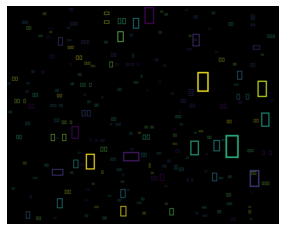

In [485]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([comnt for comnt in data['tokenizer']])
wordCloud = WordCloud(width =1000, height =800, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [521]:
###stop_word_file = stop_word_root_path+'/stopwords-bn.txt'
#print(stop_word_file)
#f = open(stop_word_file, "r", encoding="utf8")
#stop_word = f.read().split("\n")
#print(stop_word)

#final_text = " ".join(author_post)
#print(final_text)
#wordcloud = WordCloud(stopwords = stop_word, font_path='/usr/share/fonts/truetype/freefont/kalpurush.ttf',
 #   width = 600, height = 500,max_font_size=300, max_words=vocabularyWordnumber,
  #                    min_word_length=4, background_color="black").generate(final_text)
#wordcloud.to_file(img_file)

Bangla word2vec embedding

In [487]:
import numpy as np
import scipy

In [ ]:
#!pip install bnlp_toolkit

In [498]:
from gensim.models import Word2Vec
sentences = [["cat", "say", "meow"], ["dog", "say", "woof"]]
model = Word2Vec(sentences, min_count=1)

In [499]:
from bnlp import BengaliWord2Vec

bwv = BengaliWord2Vec()
#model_path = data
word = 'গ্রাম'
vector = bwv.generate_word_vector(data, word)
print(vector.shape)
print(vector)

ERROR:gensim.models.word2vec:Model load error. Was model saved using code from an older Gensim Version? Try loading older model using gensim-3.8.3, then re-saving, to restore compatibility with current code.


AttributeError: ignored

In [489]:
from bn_nlp.sent2sent_embedding import sent2sent
s2s=sent2sent()
text1="আমি ভাত খাই"
text2="আমি পাস্তা খেতে চাই"
print(s2s.dist(text1,text2))

ModuleNotFoundError: ignored

Tf-idf Vectorizer

In [450]:
X=data['stemmed']
y=data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify= y)

In [452]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [453]:
vectorizer = TfidfVectorizer()
X_train_tfvect = vectorizer.fit_transform(X_train)
X_train_tfvect.shape
X_test_tfvect=vectorizer.fit_transform(X_test)

In [454]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 282
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Text                  283 non-null    object
 1   Label                 283 non-null    int64 
 2   Translated Text       283 non-null    object
 3   Removed Puncutation   283 non-null    object
 4   Removed Stopped word  283 non-null    object
 5   remove Eng            283 non-null    object
 6   stemmed               283 non-null    object
dtypes: int64(1), object(6)
memory usage: 17.7+ KB


Linear SVC

In [455]:
clf = LinearSVC()
clf.fit(X_train_tfvect,y_train)

LinearSVC()

In [456]:
text_clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [457]:
predictions=text_clf.predict(X_test)

In [458]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[48  1]
 [ 6  2]]


In [459]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        49
           1       0.67      0.25      0.36         8

    accuracy                           0.88        57
   macro avg       0.78      0.61      0.65        57
weighted avg       0.86      0.88      0.85        57



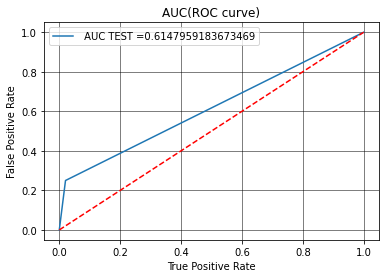

In [460]:
from sklearn.metrics import roc_curve, auc
#train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, predictions)

plt.grid()

#plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

LSTM

In [500]:
import numpy as np 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [501]:
data.head(1)

,Text,Label,Translated Text,Removed Puncutation,Removed Stopped word,remove Eng,stemmed,length,pos_tagger,tokenizer
0,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,1,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,চার দিনের মধ্যে শিক্ষার্থীকে যৌন নিপীড়নে জড়ি...,"['দিনের', 'শিক্ষার্থীকে', 'যৌন', 'নিপীড়নে', '...",দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...,দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...,16,দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...,দিনের শিক্ষার্থীকে যৌন নিপীড়নে জড়িত ব্যক্তিদ...


In [506]:
max_fatures = 2500
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['tokenizer'].values)
X = tokenizer.texts_to_sequences(data['tokenizer'].values)
X = pad_sequences(X)

In [507]:
np.shape(X)

(283, 62)

In [508]:
embed_dim = 64
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['acc'])

In [509]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 62, 64)            160000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 62, 64)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 193,154
Trainable params: 193,154
Non-trainable params: 0
_________________________________________________________________
None


In [510]:
Y = pd.get_dummies(data['Label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20,random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(226, 62) (226, 2)
(57, 62) (57, 2)


In [511]:
history=model.fit(X_train, Y_train, epochs = 10, batch_size=32, verbose = 2,validation_split=0.1)

Epoch 1/10
7/7 - 4s - loss: 0.6536 - acc: 0.7980 - val_loss: 0.5575 - val_acc: 0.9130 - 4s/epoch - 562ms/step
Epoch 2/10
7/7 - 1s - loss: 0.5030 - acc: 0.8571 - val_loss: 0.2561 - val_acc: 0.9130 - 572ms/epoch - 82ms/step
Epoch 3/10
7/7 - 1s - loss: 0.4176 - acc: 0.8571 - val_loss: 0.2732 - val_acc: 0.9130 - 591ms/epoch - 84ms/step
Epoch 4/10
7/7 - 1s - loss: 0.3769 - acc: 0.8571 - val_loss: 0.3002 - val_acc: 0.9130 - 558ms/epoch - 80ms/step
Epoch 5/10
7/7 - 1s - loss: 0.3542 - acc: 0.8571 - val_loss: 0.2604 - val_acc: 0.9130 - 568ms/epoch - 81ms/step
Epoch 6/10
7/7 - 1s - loss: 0.3408 - acc: 0.8571 - val_loss: 0.2483 - val_acc: 0.9130 - 566ms/epoch - 81ms/step
Epoch 7/10
7/7 - 1s - loss: 0.3185 - acc: 0.8571 - val_loss: 0.2677 - val_acc: 0.9130 - 567ms/epoch - 81ms/step
Epoch 8/10
7/7 - 1s - loss: 0.2905 - acc: 0.8670 - val_loss: 0.2589 - val_acc: 0.9130 - 575ms/epoch - 82ms/step
Epoch 9/10
7/7 - 1s - loss: 0.2570 - acc: 0.8818 - val_loss: 0.2453 - val_acc: 0.9130 - 571ms/epoch - 82ms

In [512]:
score = model.evaluate(X_train, Y_train,
                       batch_size=64, verbose=2)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

4/4 - 0s - loss: 0.2022 - acc: 0.9336 - 73ms/epoch - 18ms/step
Train loss: 0.20221608877182007
Train accuracy: 0.9336283206939697


In [513]:
score = model.evaluate(X_test, Y_test,
                       batch_size=64, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 - 0s - loss: 0.3550 - acc: 0.8421 - 29ms/epoch - 29ms/step
Test loss: 0.3550412952899933
Test accuracy: 0.8421052694320679


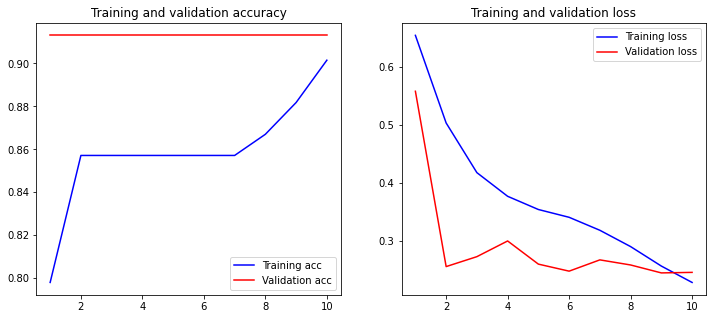

In [514]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)